TASK 7

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import matplotlib.image as mpimg

In [2]:
Fs = 100
Ts = float(1)/Fs
t = np.arange(0,10,Ts)

F1 = 5
A1 = 0.6
phi1 = np.pi/3

y1 = A1*np.sin(2*np.pi*F1*t+phi1)

F2 = 6
A2 = 0.9
phi2 = np.pi/4

y2 = A2*np.sin(2*np.pi*F2*t+phi2)

F3 = 8
A3 = 0.3
phi3 = np.pi/6

y3 = A3*np.sin(2*np.pi*F3*t+phi3)

F4 = 9
A4 = 0.4
phi4 = np.pi/2

y4 = A4*np.sin(2*np.pi*F4*t+phi4)

#add
addSig = y1+y2
# print(y1[0:5])
# print(y2[0:5])
# print(addSig[0:5])

#multi
mulSig = y2 * y4

#delay
dSig = y1
delay = 4
dT = np.arange(delay,delay + 10 , Ts)

#advance
aSig = y1
adv = 4
aT = np.arange(-adv,-adv + 10 , Ts)

#fold
y12 = y1 + y2
fSig = y12[::-1]
#print(fSig)
#print(y12)

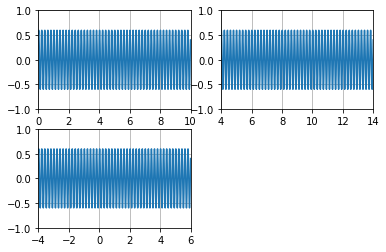

In [3]:
plt.subplot(2,2,1)
plt.plot(t,y1)
plt.axis([0,10,-1,1])
plt.grid()

plt.subplot(2,2,2)
plt.plot(dT,dSig)
plt.axis([dT[0],dT[len(dT)-1],-1,1])
plt.grid()

plt.subplot(2,2,3)
plt.plot(aT,aSig)
plt.axis([aT[0],aT[len(aT)-1],-1,1])
plt.grid()

plt.show()

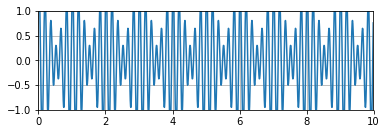

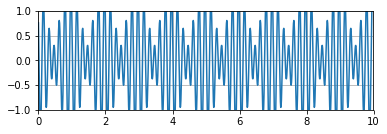

In [4]:
plt.subplot(2,1,1)
plt.plot(t,y12)
plt.axis([t[0],t[len(t)-1],-1,1])
plt.grid()

plt.show()

plt.subplot(2,1,2)
plt.plot(t,fSig)
plt.axis([t[0],t[len(t)-1],-1,1])
plt.grid()

plt.show()

TASK 8

In [26]:
y1234 = y12 + y3 + y4
medOut = signal.medfilt(y1234)

movOut = []
avgM = 3.
i = 0
while i < len(y1234):
    j = 0
    tmp = 0.
    
    if i + avgM < len(y1234):
        while j < avgM:
            tmp+=y1234[i+j]
            j+=1
        tmp /= avgM
    
    else:
        tmp = y1234[i]
    
    movOut.append(tmp)
    
    i+=1
    

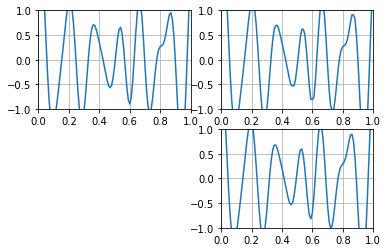

In [28]:
plt.subplot(2,2,1)
plt.plot(t,y1234)
plt.axis([t[0],1,-1,1])
plt.grid()

plt.subplot(2,2,2)
plt.plot(t,medOut)
plt.axis([t[0],1,-1,1])
plt.grid()

plt.subplot(2,2,4)
plt.plot(t,movOut)
plt.axis([t[0],1,-1,1])
plt.grid()

plt.show()

Task9

In [8]:
a = [0,1,2,3,2]
b = [1,-1,2]

c = np.convolve(a,b)

def convol(a,b):
    tempA = a
    tempB = b[::-1] #reverse
    out = []

    print (tempA)
    print (tempB)

    if len(a) < len(b):
        a , b = b , a

    lenOut = len(a) - len(b) + 1 + (len(b) - 1)*2
    #print lenOut

    i = 0
    while i < lenOut - len(b) + 1:

        t = 0
        j = i
        k = 0
        while j >= 0 :
            p = len(tempB)-1-k
            if p < 0:
                t+= 0

            else:
                t += tempA[j] * tempB[p]  
            j = j - 1
            k = k + 1
        #print t
        out.append(t)
        i = i + 1 

    i = len(a) - len(b) + 1
    while i < len(a):
        t = 0
        j = i
        k = 0
        while j < len(a) :
            t += tempA[j] * tempB[k]  
            j = j + 1
            k = k + 1
        #print t
        out.append(t)
        i = i + 1
        
        return out

# plt.plot(a)
# plt.ylabel('some numbers')
# plt.show()

# plt.plot(b)
# plt.ylabel('some numbers')
# plt.show()

# plt.plot(c)
# plt.ylabel('some numbers')
# plt.show()

out = convol(a,b)
print ("numpy =>")
print (c)
print ("manual")
print (out)

[0, 1, 2, 3, 2]
[2, -1, 1]
numpy =>
[0 1 1 3 3 4 4]
manual
[0, 1, 1, 3, 3, 4]


Task10 and 11 program to find the DFT/IDFT

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


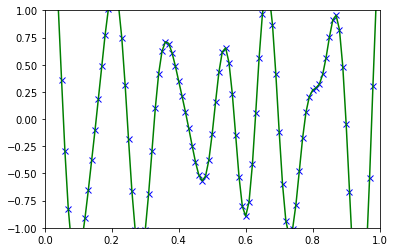

In [41]:
import numpy.fft as DFT ### Getting DFT using fft

dftOut = DFT.fftn(y1234, norm='ortho')
window = np.zeros(len(y1234))
window[:len(y1234)] = 1
idftOut = DFT.ifftn(dftOut*window, norm='ortho')

plt.plot(t, y1234, 'bx')
plt.plot(t, idftOut, 'g')
plt.axis([0,1,-1,1])
plt.show()

task #12

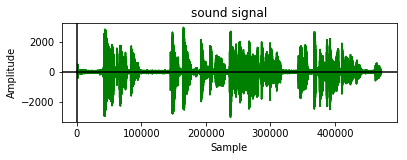

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


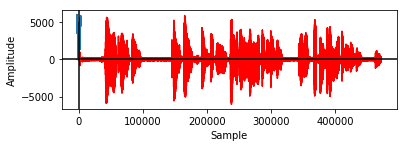

In [17]:
from scipy.io import wavfile

samplingFrequency, signalData = wavfile.read('dft_test.wav')

fft_out = fft(signalData)

plt.subplot(2,1,2)
plt.title('sound signal')
plt.plot(signalData, 'g')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.show()

plt.subplot(2,1,2)
plt.plot(fft_out, 'r')
plt.plot(signalData, np.abs(fft_out))
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.show()

Populating the interactive namespace from numpy and matplotlib


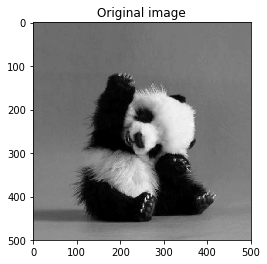

In [39]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import signal, misc
img=mpimg.imread('panda2.jpg')
imgplot = plt.imshow(img)
plt.gray()
plt.title('Original image')
plt.show()

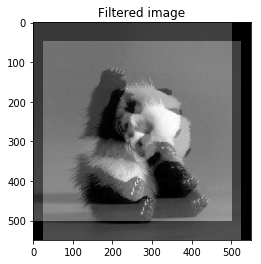

In [40]:
##DFT (Filtering)
w = np.zeros((50, 50))
w[0][0] = 1.0
w[49][25] = 1.0
image_new = signal.fftconvolve(img, w)
plt.figure()
plt.imshow(image_new)
plt.gray()
plt.title('Filtered image')
plt.show()

circular convolution